In [25]:
import pandas as pd

In [26]:
data = pd.read_csv('dataset_twitter-scraper_2023-12-05_16-03-34-228.csv')

In [27]:
data.head()

conversation_id_str lang                                          full_text
0  1731974001801810075   in  @arifin34533 @reza_nukleuz Di potcast² dia jel...
1  1731864307640729785   en  4-20-2023:  Surabaya, Indonesia:\n"We studied ...
2  1731684506078228874   in  Plissss lah\nMasa w ke surabaya pas covid mulu...
3  1731677766074925248   en  This was a fuel stop in Surabaya, Indonesia - ...
4  1731241963033358710   in  @dayroraxy @Widino Mutiara yang enak di keluar...

### Pre-Processing

In [28]:
data = data.drop('conversation_id_str', axis=1)
data = data[data['lang'] != 'en']
data

lang                                          full_text
0      in  @arifin34533 @reza_nukleuz Di potcast² dia jel...
2      in  Plissss lah\nMasa w ke surabaya pas covid mulu...
4      in  @dayroraxy @Widino Mutiara yang enak di keluar...
5      in  Profil Doni Monardo, Mantan Kepala BNPB dan Ke...
6      in  Doni Monardo Mantan Ketua Satgas Covid-19 Berp...
...   ...                                                ...
2206   in  Semakin Meningkat di Jatim, Ketahui Gejala Cov...
2207   in  Organisasi Kesehatan Dunia (WHO) secara resmi ...
2208   in  Jadwal dan Lokasi Vaksin Covid-19 Surabaya Har...
2209   in  #BeritaJatim \nJadwal dan Lokasi Vaksin Covid-...
2210   in  @e100ss Ketika WHO sudah bilang BEBAS COVID, w...

[2062 rows x 2 columns]

In [29]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [30]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')

nltk_stw_id = stopwords.words('indonesian')
print(nltk_stw_id)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def preprocess(textdata, stopwords_id, emojis):
    processedText = []

    wordLemm = WordNetLemmatizer()

    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        tweet = re.sub(urlPattern, ' ', tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "" + emojis[emoji])
        tweet = re.sub(userPattern, '', tweet)
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if word not in stopwords_id:
                if len(word) > 1:
                    word = wordLemm.lemmatize(word)
                    tweetwords += (word + ' ')

        processedText.append(tweetwords)

    return processedText

In [32]:
data['processed_text'] = preprocess(data['full_text'], nltk_stw_id, emojis)
print(data[['full_text', 'processed_text']].head(10))

                                            full_text  \
0   @arifin34533 @reza_nukleuz Di potcast² dia jel...   
2   Plissss lah\nMasa w ke surabaya pas covid mulu...   
4   @dayroraxy @Widino Mutiara yang enak di keluar...   
5   Profil Doni Monardo, Mantan Kepala BNPB dan Ke...   
6   Doni Monardo Mantan Ketua Satgas Covid-19 Berp...   
7   BI sebut QRIS Selamatkan Indonesia dari Krisis...   
8   @kompascom Buanyak sekali usia 40 an yg pengan...   
9   @Aditya5803 @widodo_naufal @Goldmind_82 Tapi h...   
10  @mawakresna @widiguruh @gibran_tweet - Kota So...   
11  @FiersaBesari 2 tahun lalu dunia bener2 runtuh...   

                                       processed_text  
0   potcast jelasin koq ma sarung tangan tsb kebia...  
2                   pliss surabaya pa covid mulu dah   
4   mutiara enak keluarga btw bakpia tugu lapis pa...  
5   profil doni monardo mantan kepala bnpb ketua s...  
6   doni monardo mantan ketua satgas covid 19 berp...  
7   bi qris selamatkan indonesia kri

In [33]:
from spacy.lang.id import Indonesian

spacy_id = Indonesian()
tokenized_texts = []

for text in data['processed_text']:
    word_tokens = spacy_id(text)
    tokenized_texts.append([token.text for token in word_tokens])

data['word_tokens'] = tokenized_texts

print(data[['processed_text', 'word_tokens']])

                                         processed_text  \
0     potcast jelasin koq ma sarung tangan tsb kebia...   
2                     pliss surabaya pa covid mulu dah    
4     mutiara enak keluarga btw bakpia tugu lapis pa...   
5     profil doni monardo mantan kepala bnpb ketua s...   
6     doni monardo mantan ketua satgas covid 19 berp...   
...                                                 ...   
2206  meningkat jatim ketahui gejala covid arcturus ...   
2207  organisasi kesehatan dunia who resmi mengumumk...   
2208  jadwal lokasi vaksin covid 19 surabaya mei 202...   
2209  beritajatim jadwal lokasi vaksin covid 19 sura...   
2210  who bilang bebas covid walikota surabaya knp m...   

                                            word_tokens  
0     [potcast, jelasin, koq, ma, sarung, tangan, ts...  
2               [pliss, surabaya, pa, covid, mulu, dah]  
4     [mutiara, enak, keluarga, btw, bakpia, tugu, l...  
5     [profil, doni, monardo, mantan, kepala, bnpb, ...  
6

In [34]:
negative_words = pd.read_csv('negative.tsv', sep='\t', header=None, names=['word', 'weight'])
positive_words = pd.read_csv('positive.tsv', sep='\t', header=None, names=['word', 'weight'])

lexicon = pd.concat([negative_words, positive_words]).set_index('word')['weight'].to_dict()

data['word_weights'] = data['word_tokens'].apply(lambda tokens: [lexicon.get(token, 0) for token in tokens])

data.to_csv('sentiment_analysis_results.csv', index=False)

In [35]:
def sum_mixed_weights(row):
    total_weight = 0
    for weight in row['word_weights']:
        if isinstance(weight, (int, float)):
            total_weight += weight
        elif re.match(r'-?\d+', weight):
            total_weight += int(weight)
    return total_weight

data['polarity_score'] = data.apply(sum_mixed_weights, axis=1)

data.to_csv('sentiment_analysis_results_with_sentence_weight.csv', index=False)


In [36]:
from tabulate import tabulate

def calculate_polarity_score(polarity_score):
    if polarity_score > 0:
        return 'positive'
    elif polarity_score < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['polarity_score'].apply(calculate_polarity_score)

table = tabulate(data[['full_text', 'polarity_score', 'sentiment']], headers='keys', tablefmt='fancy_grid')
print(table)


╒══════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════════╤═════════════╕
│      │ full_text                                                                                                                                                                                                                                                                                                                                                                     │   polarity_score │ sentiment   │
╞══════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

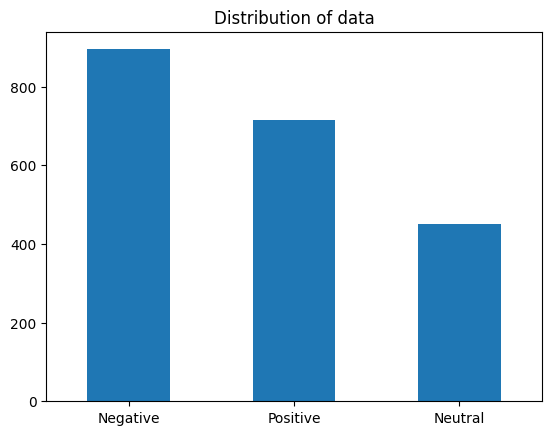

In [37]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts()

ax = sentiment_counts.plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticks(range(len(sentiment_counts)))
ax.set_xticklabels(['Negative', 'Positive', 'Neutral'], rotation=0)

plt.show()


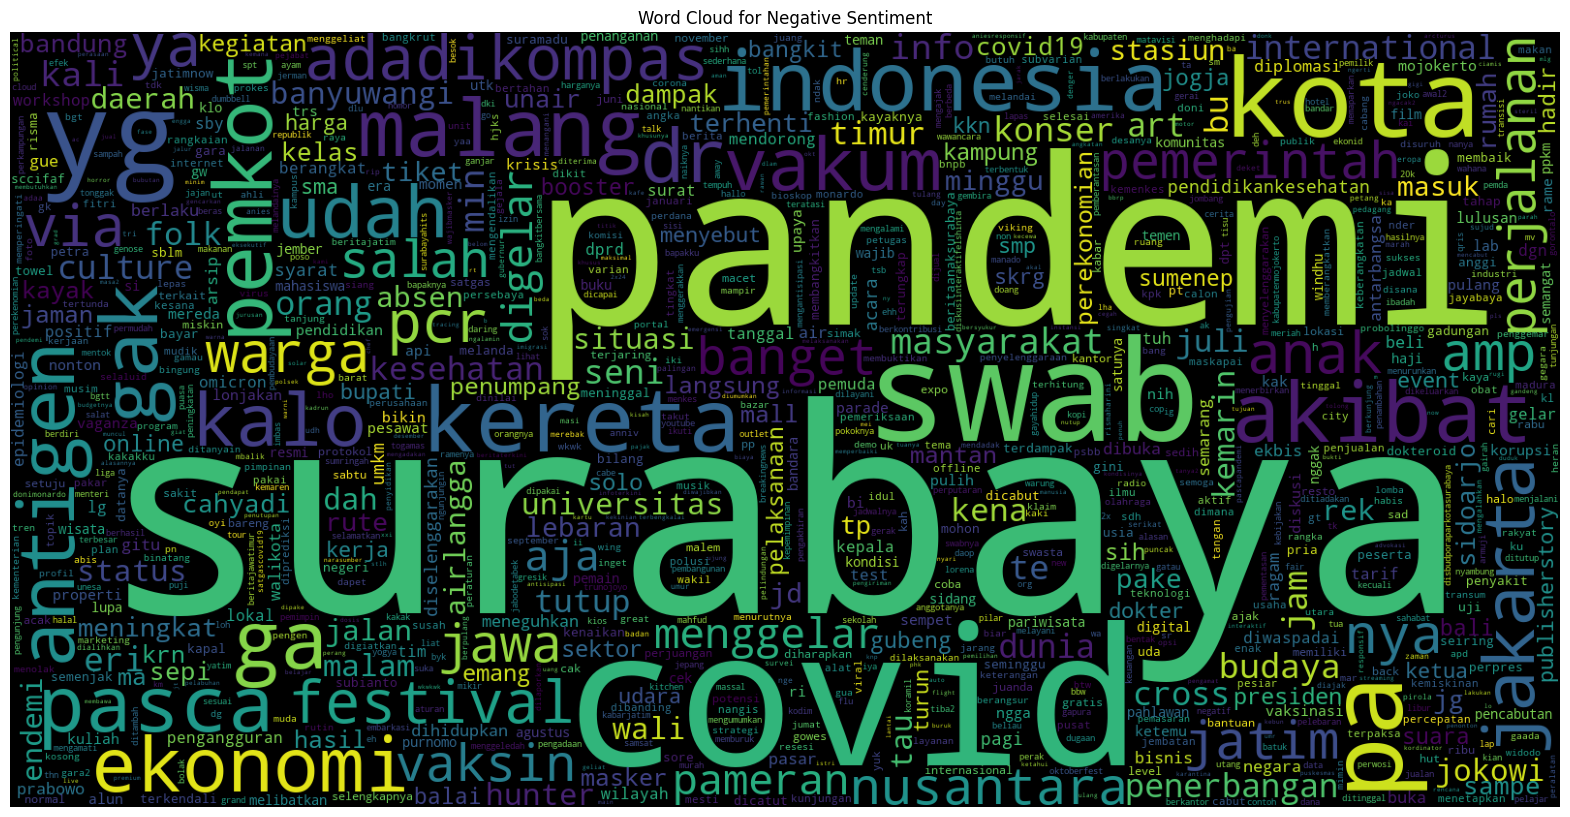

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_condition = data['sentiment'] == 'negative'
data_neg = data.loc[negative_condition, 'processed_text'][:800000]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.title("Word Cloud for Negative Sentiment")
plt.axis("off") 
plt.show()

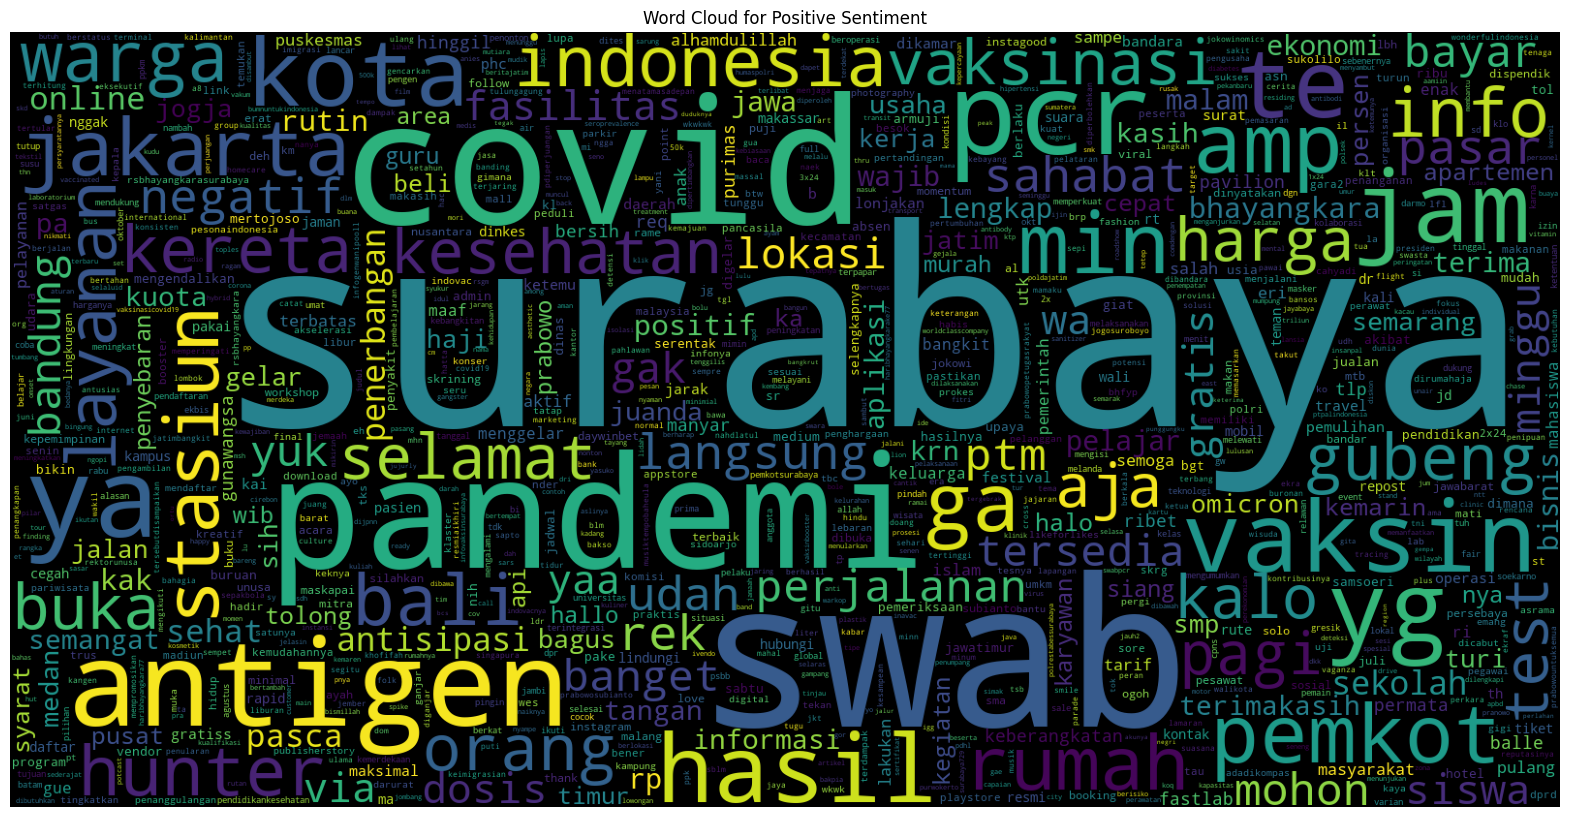

In [39]:
positive_condition = data['sentiment'] == 'positive'
data_neg = data.loc[positive_condition, 'processed_text'][:800000]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.title("Word Cloud for Positive Sentiment")
plt.axis("off") 
plt.show()

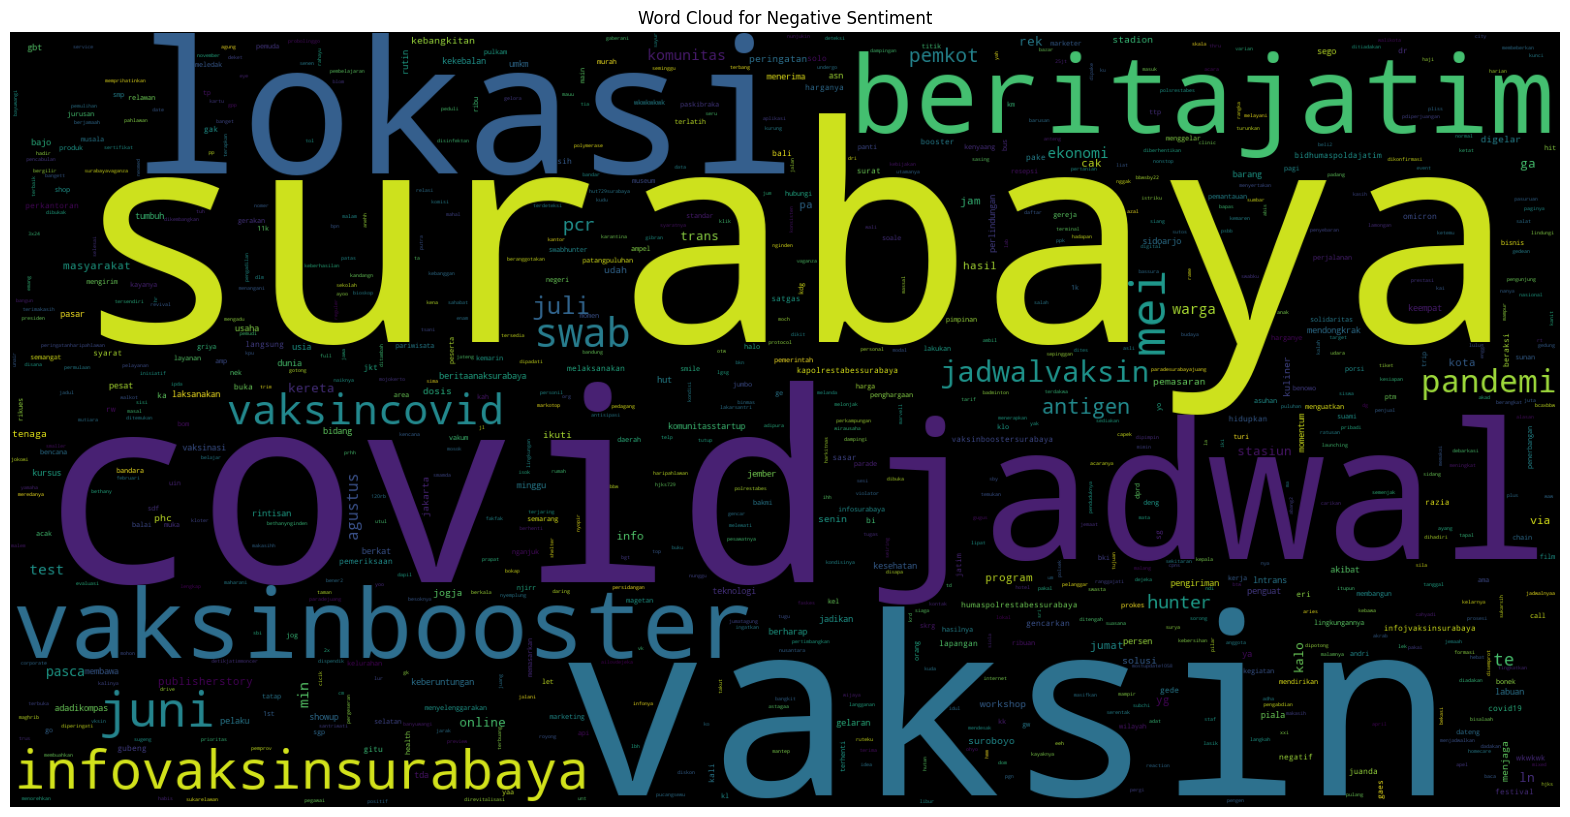

In [40]:
neutral_condition = data['sentiment'] == 'neutral'
data_neg = data.loc[neutral_condition, 'processed_text'][:800000]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.title("Word Cloud for Negative Sentiment")
plt.axis("off") 
plt.show()

### Spiliting Data & Create, Evaluating Models

In [41]:
from sklearn.model_selection import train_test_split

processed_text = data["processed_text"]
sentiment = data["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(processed_text, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')

Vectoriser fitted.


In [43]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np


def model_Evaluate(model):
    
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories = ['negative', 'positive', 'neutral']
    group_names = ['True Neg', 'False Pos', 'False Neu', 'False Neg', 'True Pos', 'False Neu', 'False Neg', 'False Pos', 'True Neu']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]

    labels = np.asarray(labels).reshape(3, 3)

    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size':18},pad=20)

              precision    recall  f1-score   support

    negative       0.77      0.96      0.85        46
     neutral       1.00      0.71      0.83        17
    positive       0.89      0.76      0.82        41

    accuracy                           0.84       104
   macro avg       0.89      0.81      0.83       104
weighted avg       0.85      0.84      0.83       104



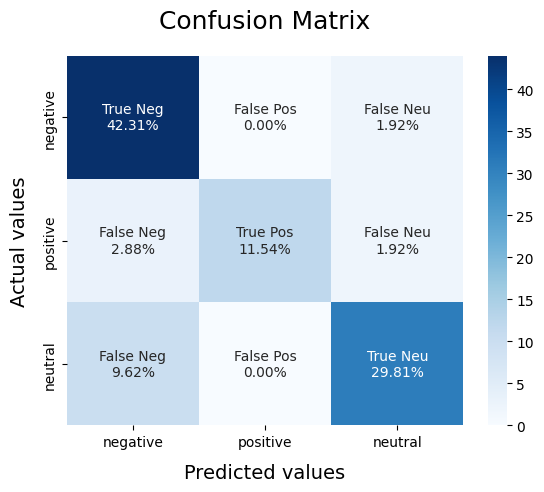

In [45]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [46]:
import pickle

file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()


file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [47]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

def preprocess(text):
    return text

def train_and_save_models():

    vectoriser = TfidfVectorizer(ngram_range=(1, 2))
    X_train_transformed = vectoriser.fit_transform(X_train)

    LRmodel = LogisticRegression()
    LRmodel.fit(X_train_transformed, y_train)  

    with open('./vectoriser-ngram-(1,2).pickle', 'wb') as file:
        pickle.dump(vectoriser, file)

    with open('./Sentiment-LR.pickle', 'wb') as file:
        pickle.dump(LRmodel, file)

def load_models():
    file = open('./vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()

    file = open('./Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()

    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)

    data = []
    for txt, pred in zip(text, sentiment):
        data.append((txt, pred))

    df = pd.DataFrame(data, columns=['text', 'sentiment'])
    df = df.replace([ 0, 1], ["Negative", "Positive"])
    return df

if __name__ == "__main__":
    vectoriser, LRmodel = load_models()

    text = ["Saya benci kamu",
            "semoga sehat.",
            "aku cinta kamu"]

    df = predict(vectoriser, LRmodel, text)
    print(df.head())


              text sentiment
0  Saya benci kamu  negative
1    semoga sehat.  positive
2   aku cinta kamu  positive
